<a href="https://colab.research.google.com/github/NatSama2/Bootcamp-Analisis-de-Datos/blob/main/Modulo-5/Seaborn_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:


# Instalación e importación de librerías
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configuración de estilo
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Datos de ejemplo para los ejercicios
np.random.seed(42)

# Dataset de ventas ficticias
ventas_data = pd.DataFrame({
    'mes': ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio'] * 4,
    'vendedor': ['Ana', 'Carlos', 'Luis', 'María'] * 6,
    'ventas': np.random.normal(15000, 3000, 24),
    'region': ['Norte', 'Sur', 'Este', 'Oeste'] * 6,
    'producto': ['A', 'B', 'C', 'A', 'B', 'C'] * 4
})

# Dataset de estudiantes ficticios
estudiantes_data = pd.DataFrame({
    'estudiante': [f'Est_{i}' for i in range(1, 101)],
    'matematicas': np.random.normal(75, 15, 100),
    'ciencias': np.random.normal(80, 12, 100),
    'historia': np.random.normal(78, 10, 100),
    'edad': np.random.randint(18, 25, 100),
    'genero': np.random.choice(['M', 'F'], 100),
    'carrera': np.random.choice(['Ingeniería', 'Medicina', 'Letras', 'Economía'], 100)
})

# Dataset de empleados ficticios
empleados_data = pd.DataFrame({
    'empleado': [f'Emp_{i}' for i in range(1, 151)],
    'salario': np.random.lognormal(10.5, 0.5, 150),
    'experiencia': np.random.randint(0, 20, 150),
    'departamento': np.random.choice(['IT', 'Marketing', 'Ventas', 'RRHH', 'Finanzas'], 150),
    'edad': np.random.randint(22, 65, 150),
    'satisfaccion': np.random.uniform(1, 10, 150)
})

print("✅ Datos cargados exitosamente")
print(f"📊 Datos de ventas: {ventas_data.shape}")
print(f"🎓 Datos de estudiantes: {estudiantes_data.shape}")
print(f"💼 Datos de empleados: {empleados_data.shape}")



✅ Datos cargados exitosamente
📊 Datos de ventas: (24, 5)
🎓 Datos de estudiantes: (100, 7)
💼 Datos de empleados: (150, 6)



1. GRÁFICOS DE LÍNEA (lineplot)

📈 Ejercicio 1.1: Evolución de ventas por mes


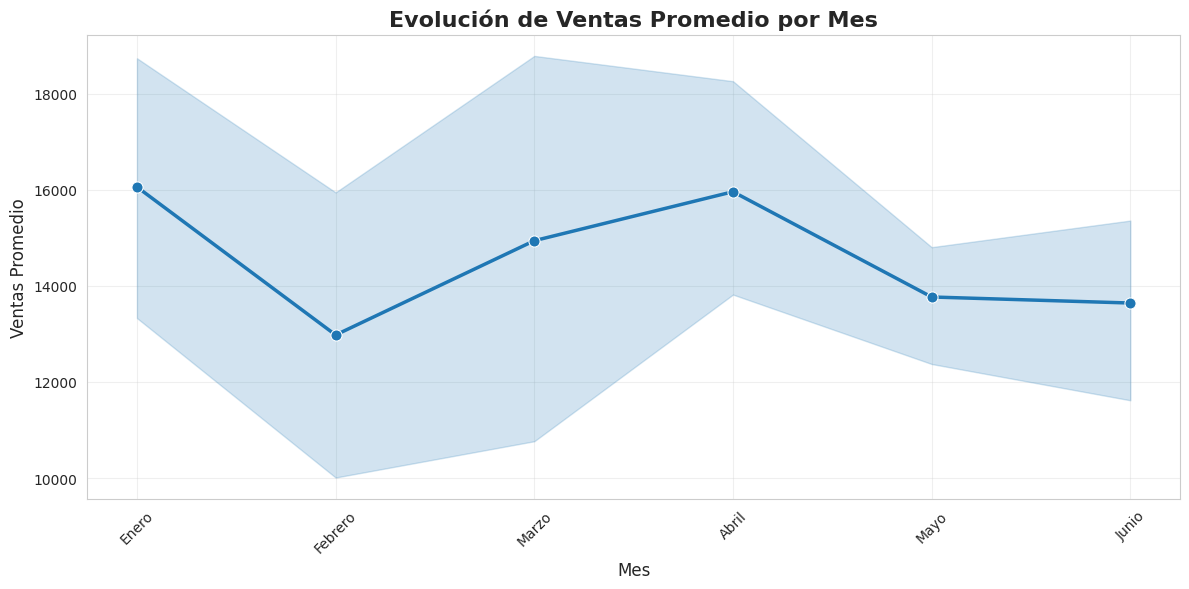

📊 Análisis:
• Mes con mayores ventas: Enero
• Mes con menores ventas: Febrero
• Promedio general: $14557

📈 Ejercicio 1.2: Comparación de ventas por vendedor


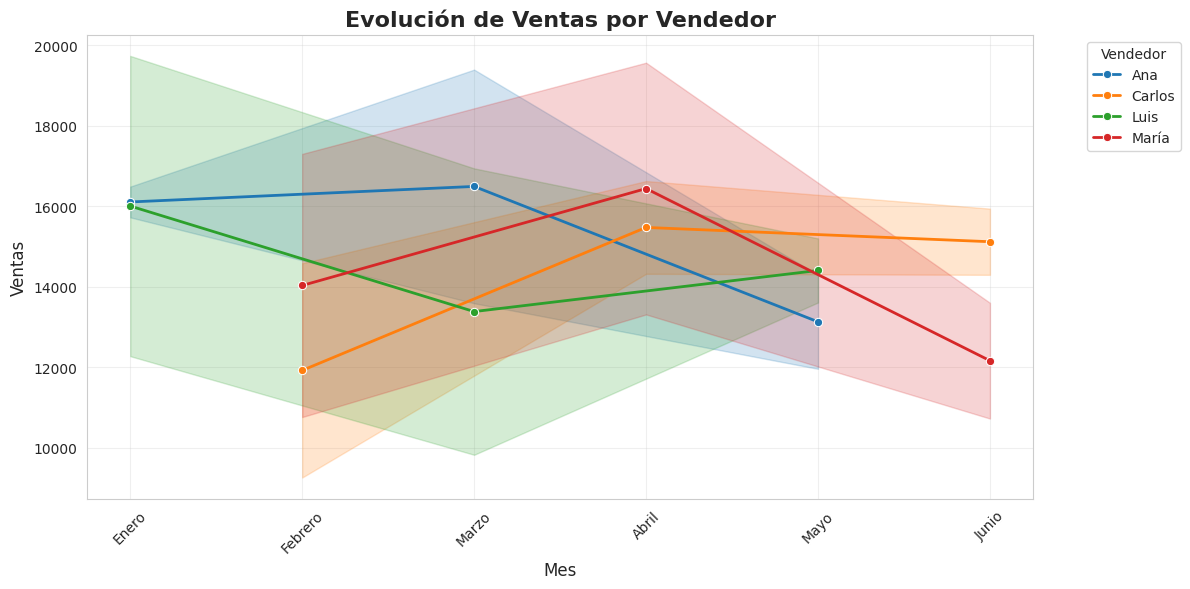

📊 Análisis:
• Ranking de vendedores por promedio de ventas:
  1. Ana: $15244
  2. Luis: $14599
  3. María: $14213
  4. Carlos: $14173


In [12]:
#=============================================================================
# 1. GRÁFICOS DE LÍNEA (lineplot)
# =============================================================================

print("\n" + "="*50)
print("1. GRÁFICOS DE LÍNEA (lineplot)")
print("="*50)

# Ejercicio 1.1: Evolución de ventas por mes
print("\n📈 Ejercicio 1.1: Evolución de ventas por mes")

# Preparar datos
ventas_mes = ventas_data.groupby('mes')['ventas'].mean().reset_index()
orden_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio']

plt.figure(figsize=(12, 6))
sns.lineplot(data=ventas_data, x='mes', y='ventas', marker='o', linewidth=2.5, markersize=8)
plt.title('Evolución de Ventas Promedio por Mes', fontsize=16, fontweight='bold')
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Ventas Promedio', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Análisis
print("📊 Análisis:")
print(f"• Mes con mayores ventas: {ventas_mes.loc[ventas_mes['ventas'].idxmax(), 'mes']}")
print(f"• Mes con menores ventas: {ventas_mes.loc[ventas_mes['ventas'].idxmin(), 'mes']}")
print(f"• Promedio general: ${ventas_mes['ventas'].mean():.0f}")

# Ejercicio 1.2: Comparación de ventas por vendedor a lo largo del tiempo
print("\n📈 Ejercicio 1.2: Comparación de ventas por vendedor")

plt.figure(figsize=(12, 6))
sns.lineplot(data=ventas_data, x='mes', y='ventas', hue='vendedor', marker='o', linewidth=2)
plt.title('Evolución de Ventas por Vendedor', fontsize=16, fontweight='bold')
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Ventas', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Vendedor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Análisis
vendedor_promedio = ventas_data.groupby('vendedor')['ventas'].mean().sort_values(ascending=False)
print("📊 Análisis:")
print("• Ranking de vendedores por promedio de ventas:")
for i, (vendedor, promedio) in enumerate(vendedor_promedio.items(), 1):
    print(f"  {i}. {vendedor}: ${promedio:.0f}")



2. GRÁFICOS DE DISPERSIÓN (scatterplot)

🔍 Ejercicio 2.1: Relación entre matemáticas y ciencias


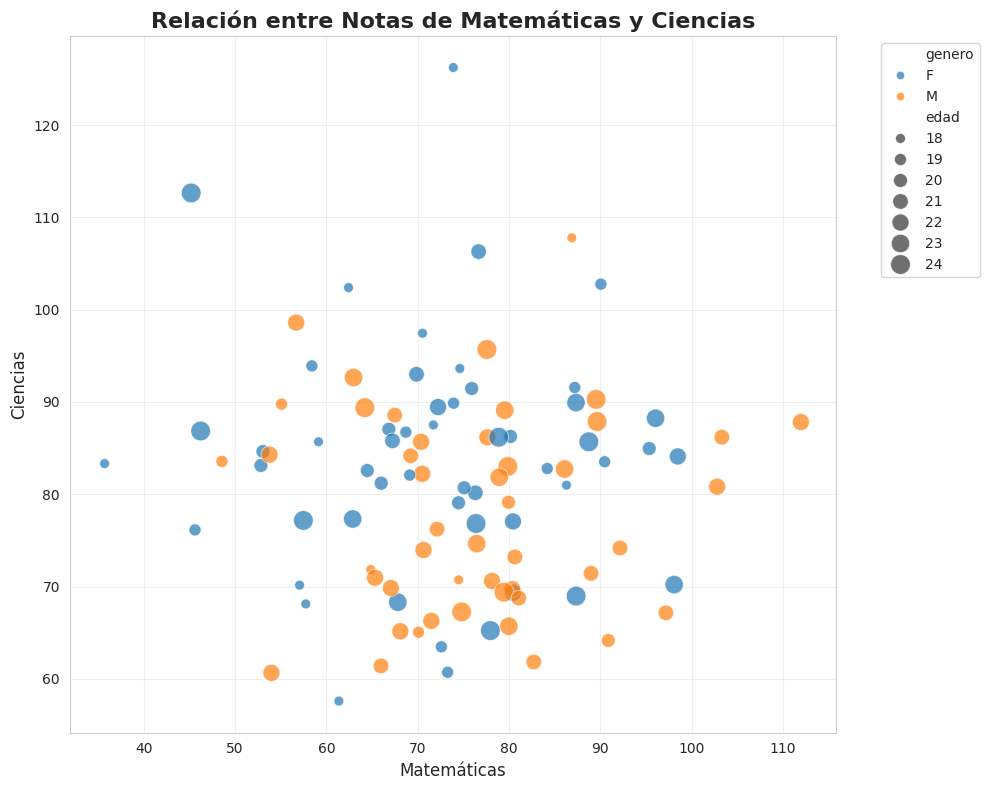

📊 Análisis:
• Correlación matemáticas-ciencias: -0.036
• Interpretación: Correlación débil

🔍 Ejercicio 2.2: Salario vs Experiencia por departamento


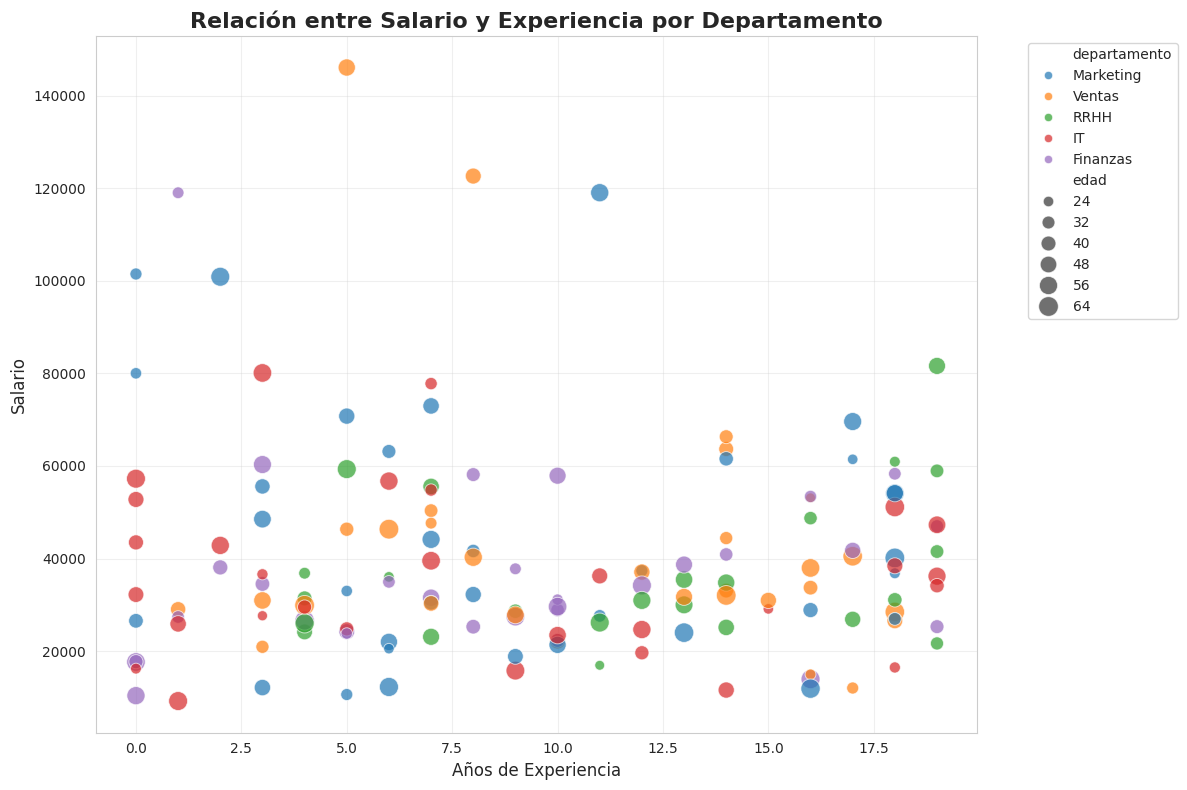

📊 Análisis:
• Salario promedio por departamento:
  • Marketing: $44936
  • Ventas: $42583
  • RRHH: $37165
  • Finanzas: $36722
  • IT: $36393


In [13]:

# =============================================================================
# 2. GRÁFICOS DE DISPERSIÓN (scatterplot)
# =============================================================================

print("\n" + "="*50)
print("2. GRÁFICOS DE DISPERSIÓN (scatterplot)")
print("="*50)

# Ejercicio 2.1: Relación entre notas de matemáticas y ciencias
print("\n🔍 Ejercicio 2.1: Relación entre matemáticas y ciencias")

plt.figure(figsize=(10, 8))
sns.scatterplot(data=estudiantes_data, x='matematicas', y='ciencias', hue='genero',
                size='edad', sizes=(50, 200), alpha=0.7)
plt.title('Relación entre Notas de Matemáticas y Ciencias', fontsize=16, fontweight='bold')
plt.xlabel('Matemáticas', fontsize=12)
plt.ylabel('Ciencias', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Análisis de correlación
correlacion = estudiantes_data['matematicas'].corr(estudiantes_data['ciencias'])
print("📊 Análisis:")
print(f"• Correlación matemáticas-ciencias: {correlacion:.3f}")
print(f"• Interpretación: {'Correlación fuerte' if abs(correlacion) > 0.7 else 'Correlación moderada' if abs(correlacion) > 0.3 else 'Correlación débil'}")

# Ejercicio 2.2: Salario vs Experiencia por departamento
print("\n🔍 Ejercicio 2.2: Salario vs Experiencia por departamento")

plt.figure(figsize=(12, 8))
sns.scatterplot(data=empleados_data, x='experiencia', y='salario', hue='departamento',
                size='edad', sizes=(50, 200), alpha=0.7)
plt.title('Relación entre Salario y Experiencia por Departamento', fontsize=16, fontweight='bold')
plt.xlabel('Años de Experiencia', fontsize=12)
plt.ylabel('Salario', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Análisis
salario_dept = empleados_data.groupby('departamento')['salario'].mean().sort_values(ascending=False)
print("📊 Análisis:")
print("• Salario promedio por departamento:")
for dept, salario in salario_dept.items():
    print(f"  • {dept}: ${salario:.0f}")



3. GRÁFICOS DE BARRAS (barplot)

📊 Ejercicio 3.1: Ventas promedio por región


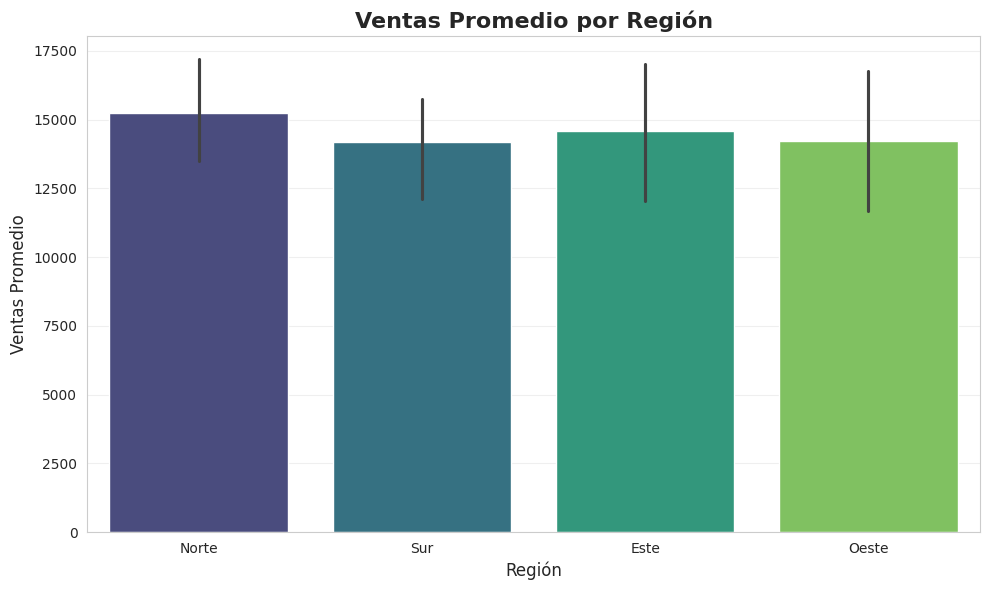

📊 Análisis:
• Estadísticas por región:
  • Este: $14599 ± $3505
  • Norte: $15244 ± $2586
  • Oeste: $14213 ± $3563
  • Sur: $14173 ± $2588

📊 Ejercicio 3.2: Estudiantes por carrera y género


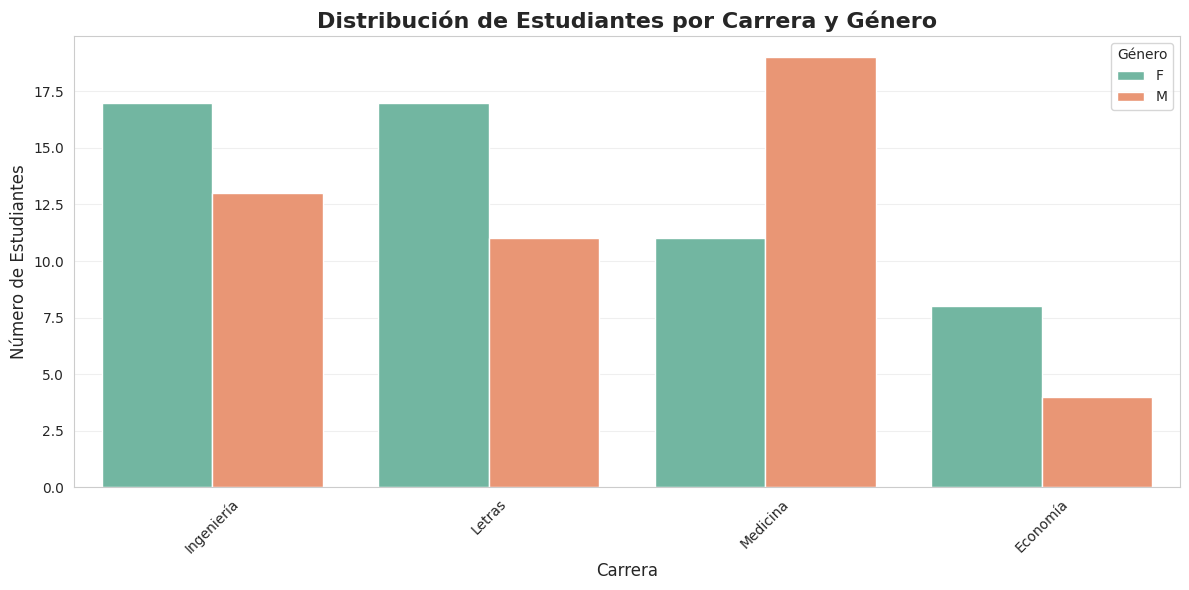

📊 Análisis:
• Distribución por carrera y género:
genero       F   M
carrera           
Economía     8   4
Ingeniería  17  13
Letras      17  11
Medicina    11  19


In [14]:
# =============================================================================
# 3. GRÁFICOS DE BARRAS (barplot)
# =============================================================================

print("\n" + "="*50)
print("3. GRÁFICOS DE BARRAS (barplot)")
print("="*50)

# Ejercicio 3.1: Ventas promedio por región
print("\n📊 Ejercicio 3.1: Ventas promedio por región")

plt.figure(figsize=(10, 6))
sns.barplot(data=ventas_data, x='region', y='ventas', palette='viridis')
plt.title('Ventas Promedio por Región', fontsize=16, fontweight='bold')
plt.xlabel('Región', fontsize=12)
plt.ylabel('Ventas Promedio', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Análisis
region_stats = ventas_data.groupby('region')['ventas'].agg(['mean', 'std']).round(0)
print("📊 Análisis:")
print("• Estadísticas por región:")
for region, stats in region_stats.iterrows():
    print(f"  • {region}: ${stats['mean']:.0f} ± ${stats['std']:.0f}")

# Ejercicio 3.2: Número de estudiantes por carrera y género
print("\n📊 Ejercicio 3.2: Estudiantes por carrera y género")

plt.figure(figsize=(12, 6))
sns.countplot(data=estudiantes_data, x='carrera', hue='genero', palette='Set2')
plt.title('Distribución de Estudiantes por Carrera y Género', fontsize=16, fontweight='bold')
plt.xlabel('Carrera', fontsize=12)
plt.ylabel('Número de Estudiantes', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Género')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Análisis
genero_carrera = estudiantes_data.groupby(['carrera', 'genero']).size().unstack(fill_value=0)
print("📊 Análisis:")
print("• Distribución por carrera y género:")
print(genero_carrera)



4. HISTOGRAMAS (histplot)

📈 Ejercicio 4.1: Distribución de notas de matemáticas


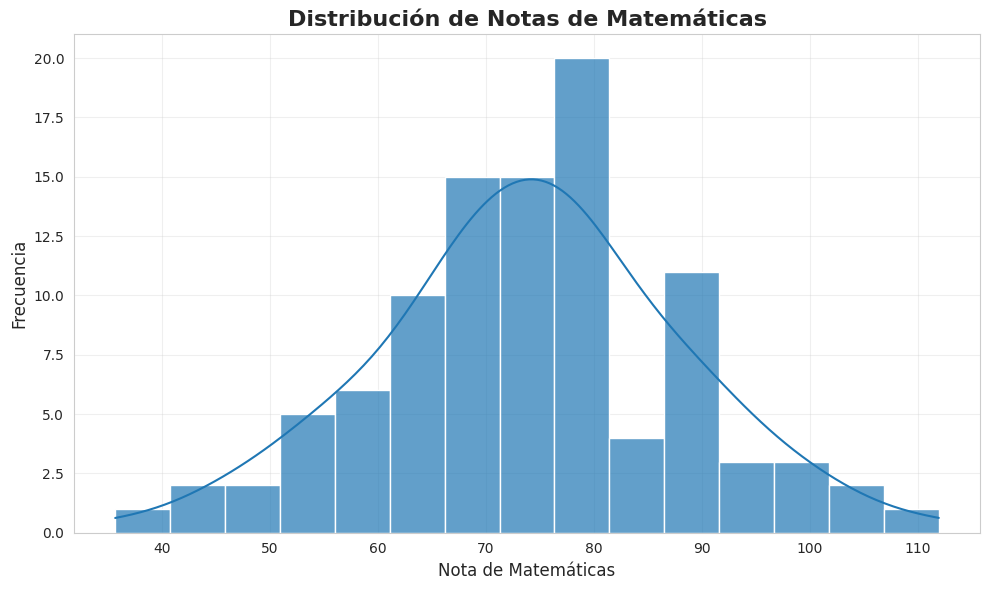

📊 Análisis estadístico:
• Media: 74.09
• Mediana: 74.47
• Desviación estándar: 13.93
• Rango: 35.70 - 111.95

📈 Ejercicio 4.2: Distribución de salarios por departamento


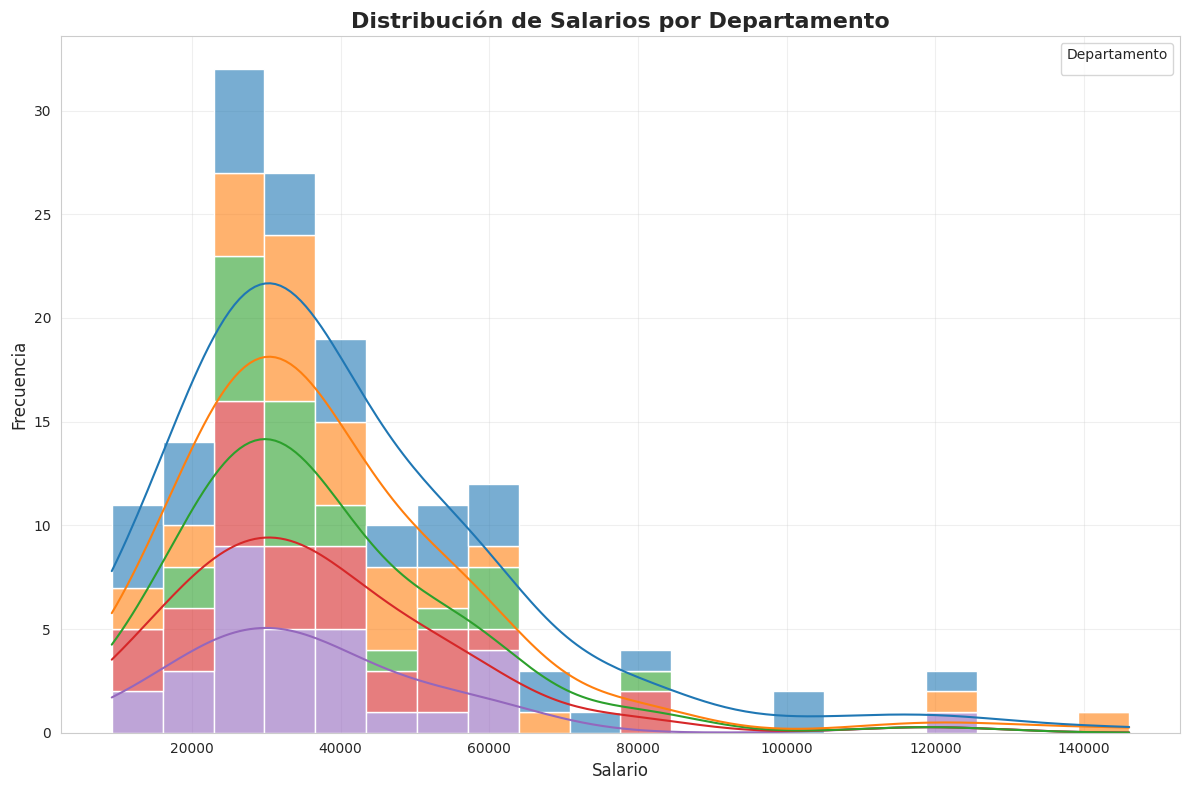

In [15]:

# =============================================================================
# 4. HISTOGRAMAS (histplot)
# =============================================================================

print("\n" + "="*50)
print("4. HISTOGRAMAS (histplot)")
print("="*50)

# Ejercicio 4.1: Distribución de notas de matemáticas
print("\n📈 Ejercicio 4.1: Distribución de notas de matemáticas")

plt.figure(figsize=(10, 6))
sns.histplot(data=estudiantes_data, x='matematicas', bins=15, kde=True, alpha=0.7)
plt.title('Distribución de Notas de Matemáticas', fontsize=16, fontweight='bold')
plt.xlabel('Nota de Matemáticas', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Análisis estadístico
math_stats = estudiantes_data['matematicas'].describe()
print("📊 Análisis estadístico:")
print(f"• Media: {math_stats['mean']:.2f}")
print(f"• Mediana: {math_stats['50%']:.2f}")
print(f"• Desviación estándar: {math_stats['std']:.2f}")
print(f"• Rango: {math_stats['min']:.2f} - {math_stats['max']:.2f}")

# Ejercicio 4.2: Distribución de salarios por departamento
print("\n📈 Ejercicio 4.2: Distribución de salarios por departamento")

plt.figure(figsize=(12, 8))
sns.histplot(data=empleados_data, x='salario', hue='departamento', bins=20,
             alpha=0.6, kde=True, multiple='stack')
plt.title('Distribución de Salarios por Departamento', fontsize=16, fontweight='bold')
plt.xlabel('Salario', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.legend(title='Departamento')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



5. GRÁFICOS DE CAJA (boxplot)

📦 Ejercicio 5.1: Distribución de ventas por vendedor


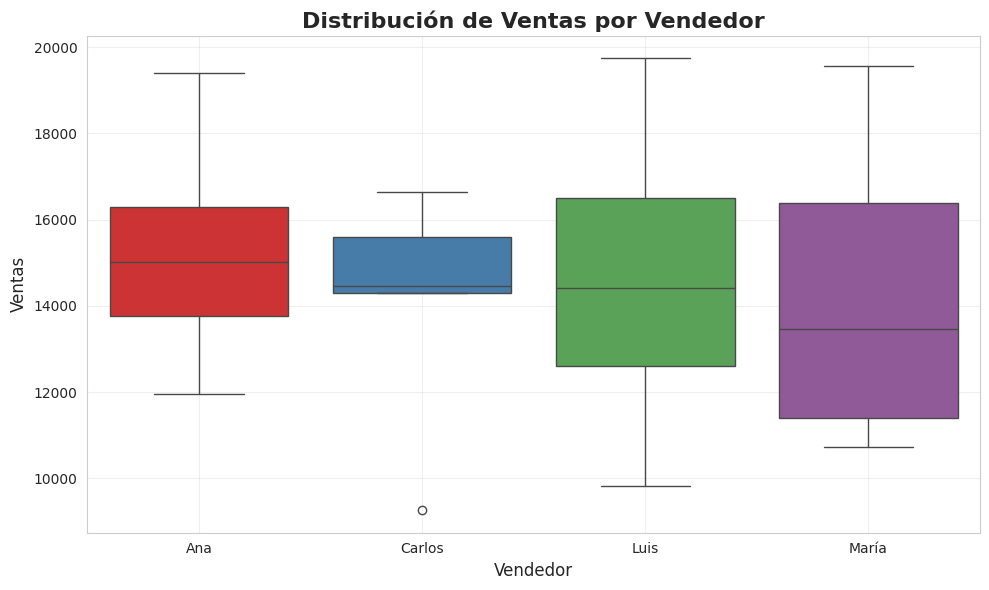

📊 Análisis de outliers:
• Ana: 0 outliers detectados
• Carlos: 1 outliers detectados
• Luis: 0 outliers detectados
• María: 0 outliers detectados

📦 Ejercicio 5.2: Distribución de notas por carrera


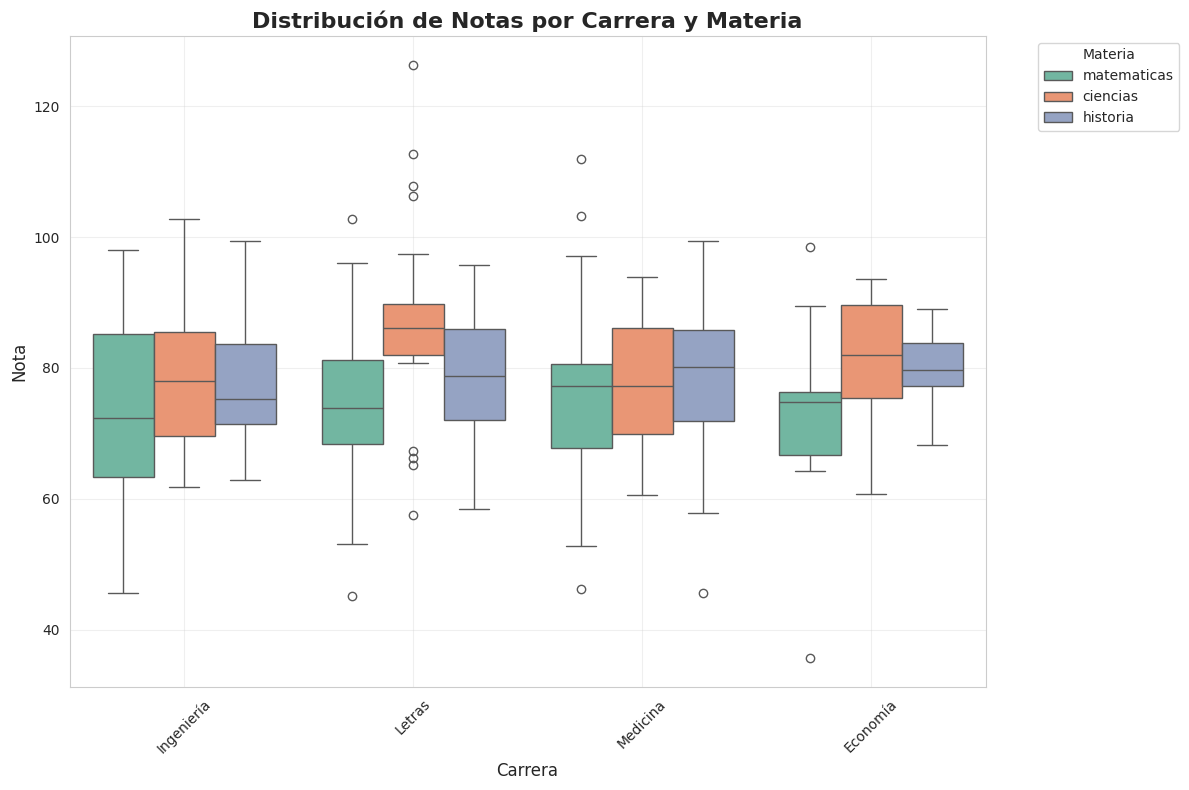

📊 Análisis por carrera:
• Ingeniería:
  - Math: 73.3
  - Ciencias: 79.1
  - Historia: 77.2
• Letras:
  - Math: 73.9
  - Ciencias: 87.0
  - Historia: 79.3
• Medicina:
  - Math: 75.6
  - Ciencias: 77.8
  - Historia: 78.9
• Economía:
  - Math: 72.7
  - Ciencias: 80.9
  - Historia: 79.8


In [16]:
# =============================================================================
# 5. GRÁFICOS DE CAJA (boxplot)
# =============================================================================

print("\n" + "="*50)
print("5. GRÁFICOS DE CAJA (boxplot)")
print("="*50)

# Ejercicio 5.1: Distribución de ventas por vendedor
print("\n📦 Ejercicio 5.1: Distribución de ventas por vendedor")

plt.figure(figsize=(10, 6))
sns.boxplot(data=ventas_data, x='vendedor', y='ventas', palette='Set1')
plt.title('Distribución de Ventas por Vendedor', fontsize=16, fontweight='bold')
plt.xlabel('Vendedor', fontsize=12)
plt.ylabel('Ventas', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Análisis de outliers
print("📊 Análisis de outliers:")
for vendedor in ventas_data['vendedor'].unique():
    datos = ventas_data[ventas_data['vendedor'] == vendedor]['ventas']
    Q1 = datos.quantile(0.25)
    Q3 = datos.quantile(0.75)
    IQR = Q3 - Q1
    outliers = datos[(datos < Q1 - 1.5*IQR) | (datos > Q3 + 1.5*IQR)]
    print(f"• {vendedor}: {len(outliers)} outliers detectados")

# Ejercicio 5.2: Notas por carrera
print("\n📦 Ejercicio 5.2: Distribución de notas por carrera")

# Crear datos en formato largo para el boxplot
notas_long = pd.melt(estudiantes_data,
                     id_vars=['carrera'],
                     value_vars=['matematicas', 'ciencias', 'historia'],
                     var_name='materia',
                     value_name='nota')

plt.figure(figsize=(12, 8))
sns.boxplot(data=notas_long, x='carrera', y='nota', hue='materia', palette='Set2')
plt.title('Distribución de Notas por Carrera y Materia', fontsize=16, fontweight='bold')
plt.xlabel('Carrera', fontsize=12)
plt.ylabel('Nota', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Materia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Análisis
print("📊 Análisis por carrera:")
for carrera in estudiantes_data['carrera'].unique():
    carrera_data = estudiantes_data[estudiantes_data['carrera'] == carrera]
    print(f"• {carrera}:")
    print(f"  - Math: {carrera_data['matematicas'].mean():.1f}")
    print(f"  - Ciencias: {carrera_data['ciencias'].mean():.1f}")
    print(f"  - Historia: {carrera_data['historia'].mean():.1f}")



6. GRÁFICOS DE VIOLÍN (violinplot)

🎻 Ejercicio 6.1: Satisfacción laboral por departamento


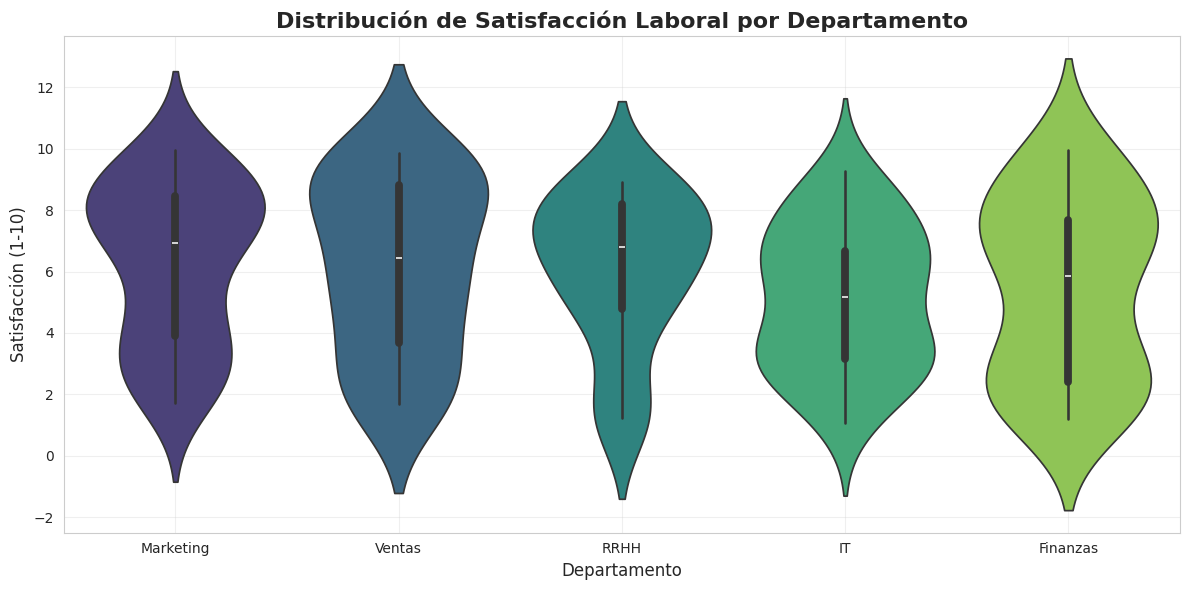

📊 Análisis de distribución:
• Marketing: Asimetría = -0.369 (sesgada izquierda)
• Ventas: Asimetría = -0.281 (sesgada izquierda)
• RRHH: Asimetría = -0.861 (sesgada izquierda)
• IT: Asimetría = 0.069 (sesgada derecha)
• Finanzas: Asimetría = -0.025 (sesgada izquierda)

🎻 Ejercicio 6.2: Distribución de edad por género


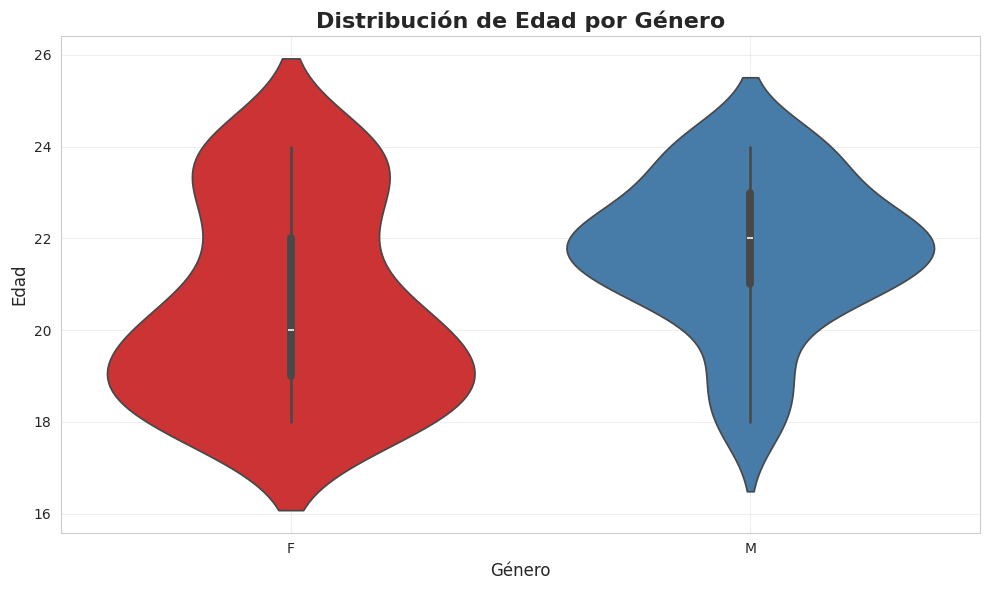

📊 Análisis estadístico:
• Edad promedio M: 21.66
• Edad promedio F: 20.49
• Test t: p-value = 0.003


In [17]:
# =============================================================================
# 6. GRÁFICOS DE VIOLÍN (violinplot)
# =============================================================================

print("\n" + "="*50)
print("6. GRÁFICOS DE VIOLÍN (violinplot)")
print("="*50)

# Ejercicio 6.1: Distribución de satisfacción por departamento
print("\n🎻 Ejercicio 6.1: Satisfacción laboral por departamento")

plt.figure(figsize=(12, 6))
sns.violinplot(data=empleados_data, x='departamento', y='satisfaccion', palette='viridis')
plt.title('Distribución de Satisfacción Laboral por Departamento', fontsize=16, fontweight='bold')
plt.xlabel('Departamento', fontsize=12)
plt.ylabel('Satisfacción (1-10)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Análisis de forma de distribución
print("📊 Análisis de distribución:")
for dept in empleados_data['departamento'].unique():
    dept_data = empleados_data[empleados_data['departamento'] == dept]['satisfaccion']
    skewness = dept_data.skew() # Use pandas .skew() method
    print(f"• {dept}: Asimetría = {skewness:.3f} {'(sesgada derecha)' if skewness > 0 else '(sesgada izquierda)' if skewness < 0 else '(simétrica)'}")

# Ejercicio 6.2: Edad vs género con comparación
print("\n🎻 Ejercicio 6.2: Distribución de edad por género")

plt.figure(figsize=(10, 6))
sns.violinplot(data=estudiantes_data, x='genero', y='edad', palette='Set1', inner='box')
plt.title('Distribución de Edad por Género', fontsize=16, fontweight='bold')
plt.xlabel('Género', fontsize=12)
plt.ylabel('Edad', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Test estadístico
from scipy.stats import ttest_ind
edad_m = estudiantes_data[estudiantes_data['genero'] == 'M']['edad']
edad_f = estudiantes_data[estudiantes_data['genero'] == 'F']['edad']
t_stat, p_value = ttest_ind(edad_m, edad_f)
print("📊 Análisis estadístico:")
print(f"• Edad promedio M: {edad_m.mean():.2f}")
print(f"• Edad promedio F: {edad_f.mean():.2f}")
print(f"• Test t: p-value = {p_value:.3f}")


7. MAPAS DE CALOR (heatmap)

🔥 Ejercicio 7.1: Matriz de correlación de notas


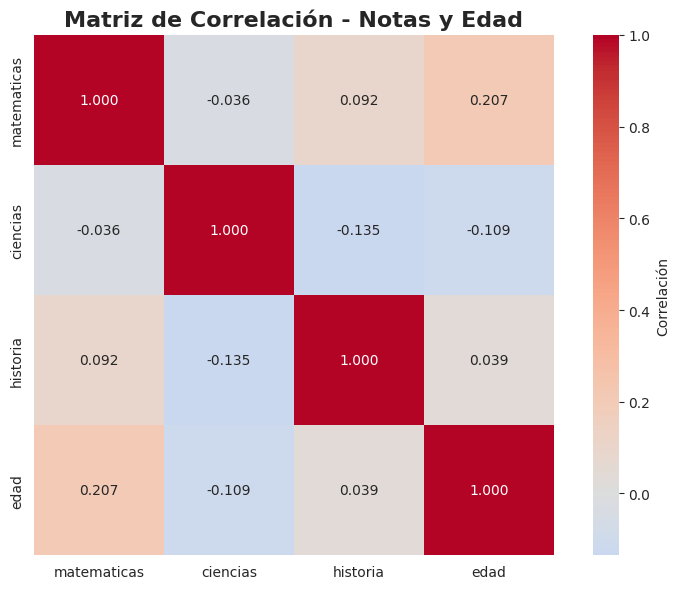

📊 Correlaciones más fuertes:
• matematicas - edad: 0.207
• ciencias - historia: -0.135
• ciencias - edad: -0.109

🔥 Ejercicio 7.2: Ventas promedio por región y mes


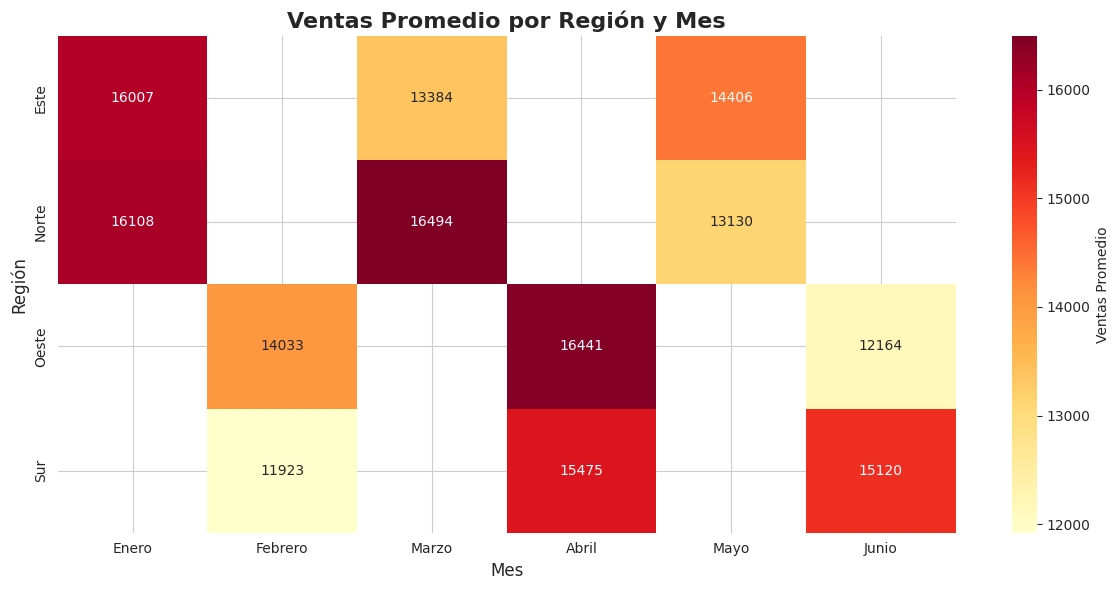

📊 Análisis de ventas:
• Mejor combinación: ('Norte', 'Marzo') = $16494
• Peor combinación: ('Sur', 'Febrero') = $11923


In [18]:
# =============================================================================
# 7. MAPAS DE CALOR (heatmap)
# =============================================================================

print("\n" + "="*50)
print("7. MAPAS DE CALOR (heatmap)")
print("="*50)

# Ejercicio 7.1: Matriz de correlación de notas
print("\n🔥 Ejercicio 7.1: Matriz de correlación de notas")

# Seleccionar solo columnas numéricas para correlación
correlation_matrix = estudiantes_data[['matematicas', 'ciencias', 'historia', 'edad']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.3f', cbar_kws={'label': 'Correlación'})
plt.title('Matriz de Correlación - Notas y Edad', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Análisis de correlaciones
print("📊 Correlaciones más fuertes:")
correlaciones = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        var1 = correlation_matrix.columns[i]
        var2 = correlation_matrix.columns[j]
        corr = correlation_matrix.iloc[i, j]
        correlaciones.append((var1, var2, corr))

correlaciones.sort(key=lambda x: abs(x[2]), reverse=True)
for var1, var2, corr in correlaciones[:3]:
    print(f"• {var1} - {var2}: {corr:.3f}")

# Ejercicio 7.2: Tabla cruzada de ventas
print("\n🔥 Ejercicio 7.2: Ventas promedio por región y mes")

# Crear tabla pivot
ventas_pivot = ventas_data.pivot_table(values='ventas', index='region', columns='mes', aggfunc='mean')
# Reordenar columnas por orden cronológico
ventas_pivot = ventas_pivot[['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio']]

plt.figure(figsize=(12, 6))
sns.heatmap(ventas_pivot, annot=True, fmt='.0f', cmap='YlOrRd',
            cbar_kws={'label': 'Ventas Promedio'})
plt.title('Ventas Promedio por Región y Mes', fontsize=16, fontweight='bold')
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Región', fontsize=12)
plt.tight_layout()
plt.show()

# Análisis
print("📊 Análisis de ventas:")
print(f"• Mejor combinación: {ventas_pivot.stack().idxmax()} = ${ventas_pivot.stack().max():.0f}")
print(f"• Peor combinación: {ventas_pivot.stack().idxmin()} = ${ventas_pivot.stack().min():.0f}")


8. ANÁLISIS COMPLEMENTARIO

🎯 Ejercicio 8.1: Distribución conjunta salario-experiencia


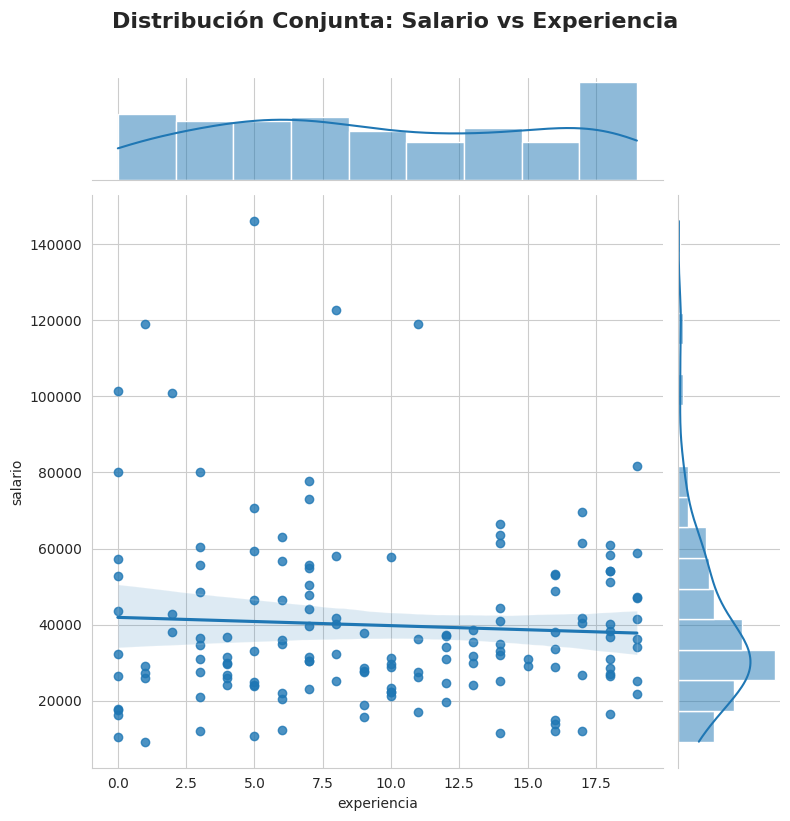


🎯 Ejercicio 8.2: Matriz de correlaciones visuales


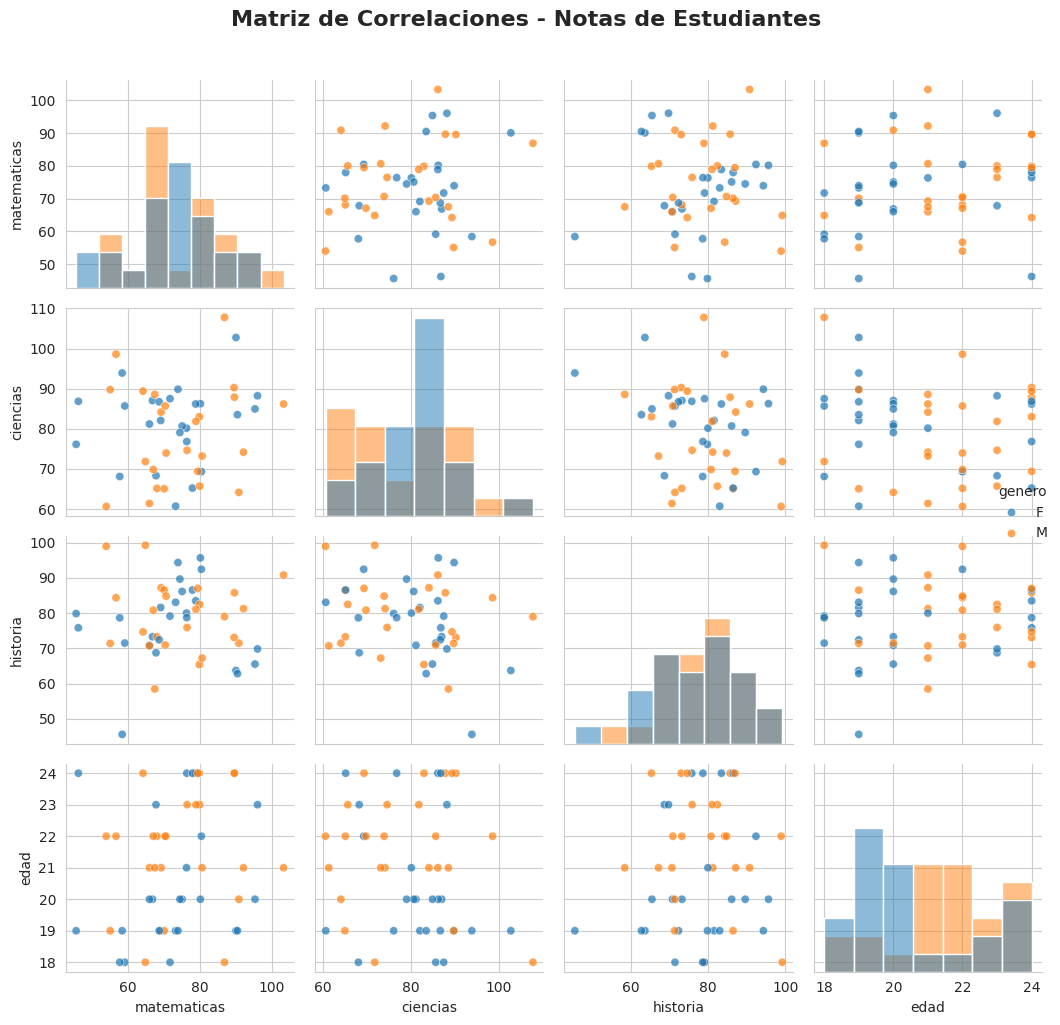


📊 RESUMEN EJECUTIVO

🎯 INSIGHTS PRINCIPALES:

📈 VENTAS:
• Mejor vendedor: Ana
• Mejor región: Norte
• Promedio general: $14557

🎓 ESTUDIANTES:
• Correlación Math-Ciencias: -0.036
• Carrera más popular: Ingeniería
• Promedio general: 77.9

💼 EMPLEADOS:
• Depto. mejor pagado: Marketing
• Correlación Exp-Salario: -0.057
• Satisfacción promedio: 5.8/10

🔧 GRÁFICOS UTILIZADOS:
✅ Line plots (2 ejercicios)
✅ Scatter plots (2 ejercicios)
✅ Bar plots (2 ejercicios)
✅ Histogramas (2 ejercicios)
✅ Box plots (2 ejercicios)
✅ Violin plots (2 ejercicios)
✅ Heatmaps (2 ejercicios)
✅ Análisis complementario (2 ejercicios)

📚 TOTAL: 16 ejercicios desarrollados

🎉 ¡Notebook completado exitosamente!
📝 Todos los gráficos de Seaborn han sido implementados con ejemplos prácticos
🔍 Cada ejercicio incluye análisis y interpretación de resultados
📊 Datos sintéticos realistas para facilitar el aprendizaje
💡 Código reutilizable y bien documentado


In [19]:
# =============================================================================
# 8. ANÁLISIS COMPLEMENTARIO
# =============================================================================

print("\n" + "="*50)
print("8. ANÁLISIS COMPLEMENTARIO")
print("="*50)

# Ejercicio 8.1: Distribución conjunta (jointplot)
print("\n🎯 Ejercicio 8.1: Distribución conjunta salario-experiencia")

sns.jointplot(data=empleados_data, x='experiencia', y='salario', kind='reg', height=8)
plt.suptitle('Distribución Conjunta: Salario vs Experiencia', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Ejercicio 8.2: Matriz de gráficos (pairplot)
print("\n🎯 Ejercicio 8.2: Matriz de correlaciones visuales")

# Seleccionar subset de datos para pairplot
subset_estudiantes = estudiantes_data[['matematicas', 'ciencias', 'historia', 'edad', 'genero']].sample(50)

sns.pairplot(subset_estudiantes, hue='genero', diag_kind='hist', plot_kws={'alpha': 0.7})
plt.suptitle('Matriz de Correlaciones - Notas de Estudiantes', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# =============================================================================
# RESUMEN FINAL
# =============================================================================

print("\n" + "="*60)
print("📊 RESUMEN EJECUTIVO")
print("="*60)

print(f"""
🎯 INSIGHTS PRINCIPALES:

📈 VENTAS:
• Mejor vendedor: {ventas_data.groupby('vendedor')['ventas'].mean().idxmax()}
• Mejor región: {ventas_data.groupby('region')['ventas'].mean().idxmax()}
• Promedio general: ${ventas_data['ventas'].mean():.0f}

🎓 ESTUDIANTES:
• Correlación Math-Ciencias: {estudiantes_data['matematicas'].corr(estudiantes_data['ciencias']):.3f}
• Carrera más popular: {estudiantes_data['carrera'].value_counts().index[0]}
• Promedio general: {estudiantes_data[['matematicas', 'ciencias', 'historia']].mean().mean():.1f}

💼 EMPLEADOS:
• Depto. mejor pagado: {empleados_data.groupby('departamento')['salario'].mean().idxmax()}
• Correlación Exp-Salario: {empleados_data['experiencia'].corr(empleados_data['salario']):.3f}
• Satisfacción promedio: {empleados_data['satisfaccion'].mean():.1f}/10

🔧 GRÁFICOS UTILIZADOS:
✅ Line plots (2 ejercicios)
✅ Scatter plots (2 ejercicios)
✅ Bar plots (2 ejercicios)
✅ Histogramas (2 ejercicios)
✅ Box plots (2 ejercicios)
✅ Violin plots (2 ejercicios)
✅ Heatmaps (2 ejercicios)
✅ Análisis complementario (2 ejercicios)

📚 TOTAL: 16 ejercicios desarrollados
""")

print("🎉 ¡Notebook completado exitosamente!")
print("📝 Todos los gráficos de Seaborn han sido implementados con ejemplos prácticos")
print("🔍 Cada ejercicio incluye análisis y interpretación de resultados")
print("📊 Datos sintéticos realistas para facilitar el aprendizaje")
print("💡 Código reutilizable y bien documentado")
print("="*60)

# Gráficos de Dispersión Avanzados


##Ejemplo 1: Scatter plot con regresión lineal

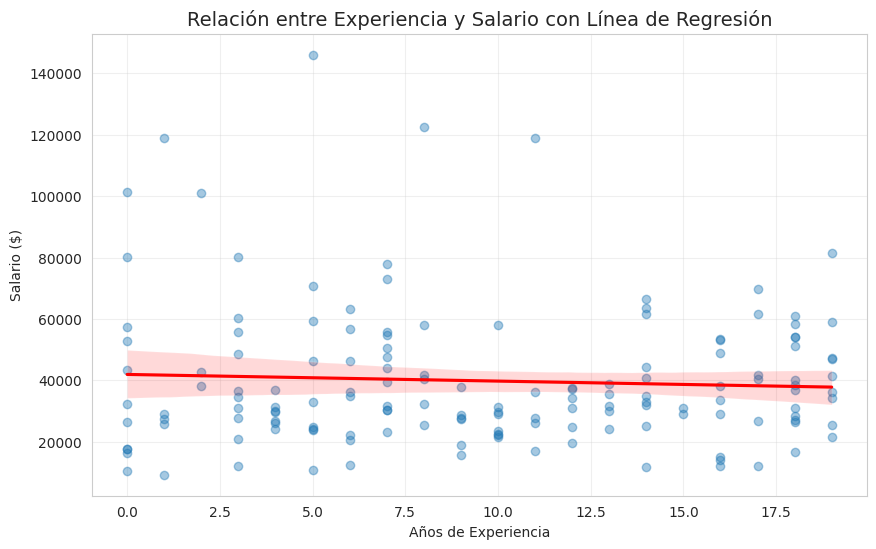

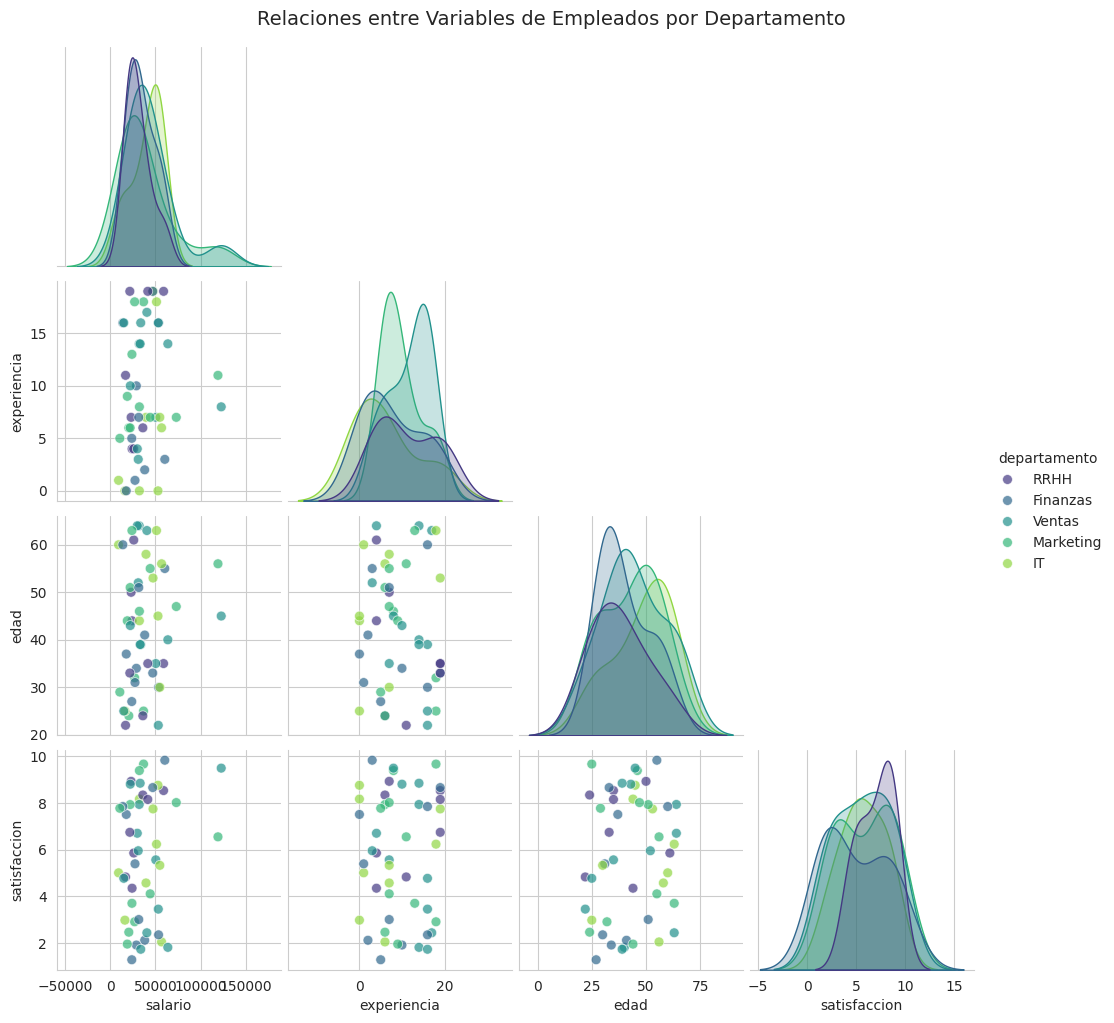

In [20]:
#. Gráficos de Dispersión Avanzados
#Ejemplo 1: Scatter plot con regresión lineal

plt.figure(figsize=(10, 6))
sns.regplot(data=empleados_data, x='experiencia', y='salario',
           scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.title('Relación entre Experiencia y Salario con Línea de Regresión', fontsize=14)
plt.xlabel('Años de Experiencia')
plt.ylabel('Salario ($)')
plt.grid(True, alpha=0.3)
plt.show()

# Seleccionar subset de datos
subset_empleados = empleados_data[['salario', 'experiencia', 'edad', 'satisfaccion', 'departamento']].sample(50)

# Crear pairplot con más personalización
g = sns.pairplot(subset_empleados, hue='departamento',
                palette='viridis',
                plot_kws={'alpha':0.7, 's':50},
                diag_kind='kde',
                corner=True)
g.fig.suptitle('Relaciones entre Variables de Empleados por Departamento', y=1.02, fontsize=14)
plt.show()

#2. Gráficos de Distribución Mejorados


##Ejemplo 3: Histograma con múltiples variables

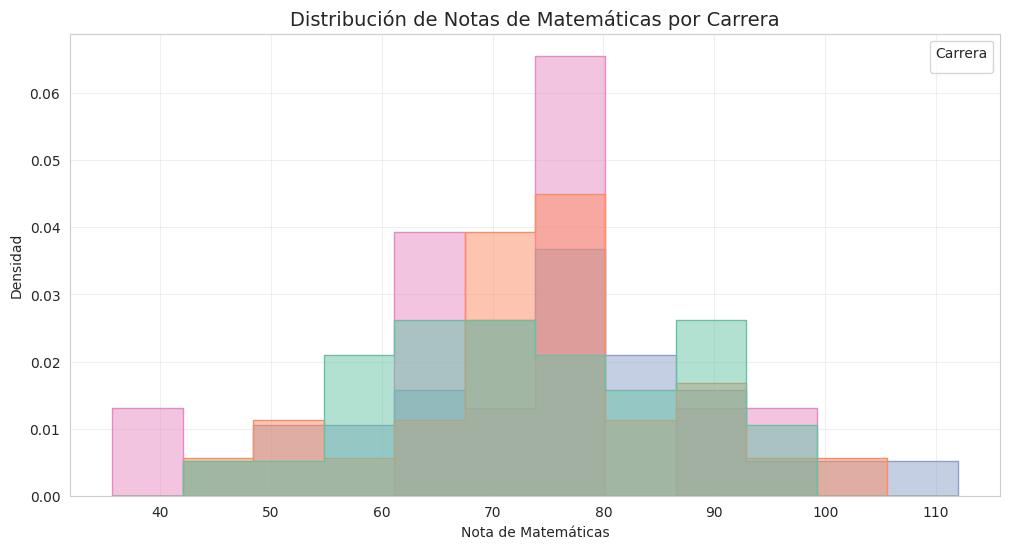

In [21]:
#2. Gráficos de Distribución Mejorados
#Ejemplo 3: Histograma con múltiples variables
plt.figure(figsize=(12, 6))
sns.histplot(data=estudiantes_data,
            x='matematicas',
            hue='carrera',
            element='step',
            stat='density',
            common_norm=False,
            palette='Set2',
            alpha=0.5)
plt.title('Distribución de Notas de Matemáticas por Carrera', fontsize=14)
plt.xlabel('Nota de Matemáticas')
plt.ylabel('Densidad')
plt.legend(title='Carrera')
plt.grid(True, alpha=0.3)
plt.show()

##Ejemplo 4: ECDF Plot (Empirical Cumulative Distribution Function)

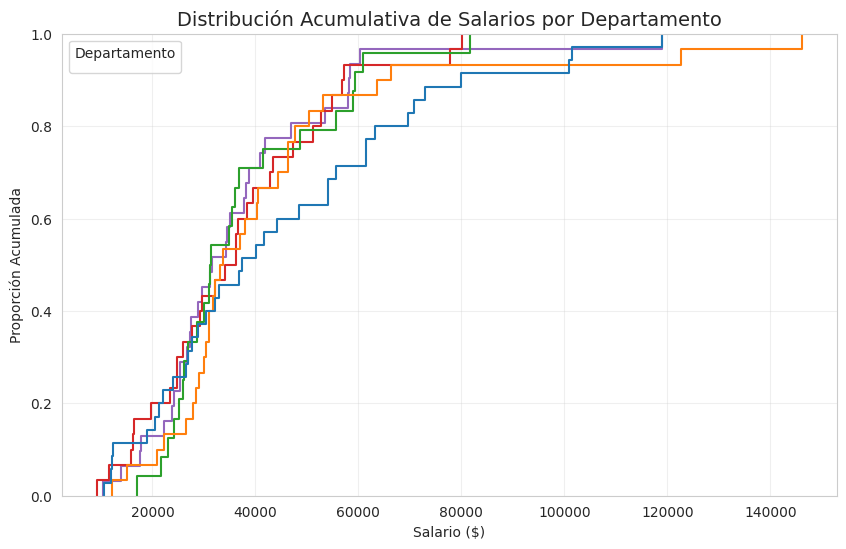

In [22]:
#Ejemplo 4: ECDF Plot (Empirical Cumulative Distribution Function)

plt.figure(figsize=(10, 6))
sns.ecdfplot(data=empleados_data, x='salario', hue='departamento', stat='proportion')
plt.title('Distribución Acumulativa de Salarios por Departamento', fontsize=14)
plt.xlabel('Salario ($)')
plt.ylabel('Proporción Acumulada')
plt.grid(True, alpha=0.3)
plt.legend(title='Departamento')
plt.show()

#3. Gráficos Categóricos Extendidos


##Ejemplo 5: Gráfico de barras apiladas

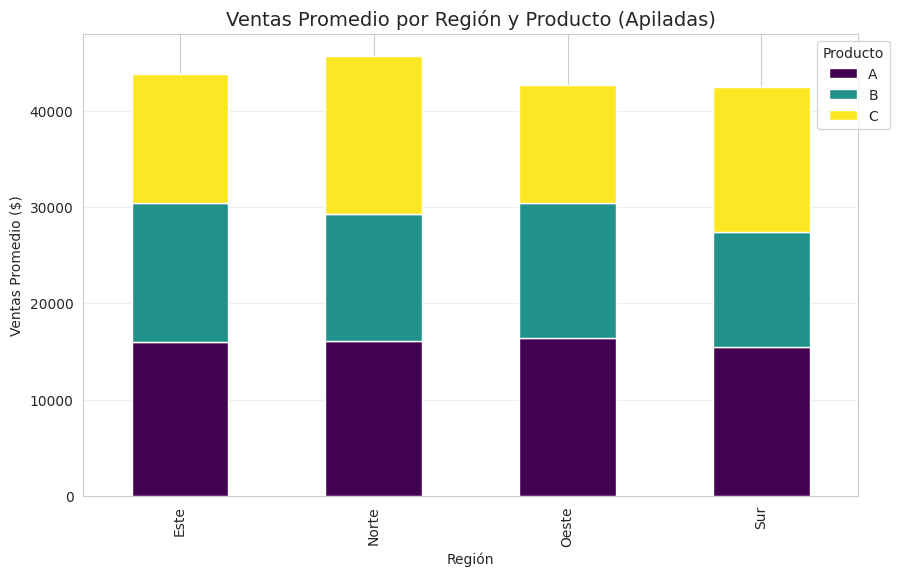

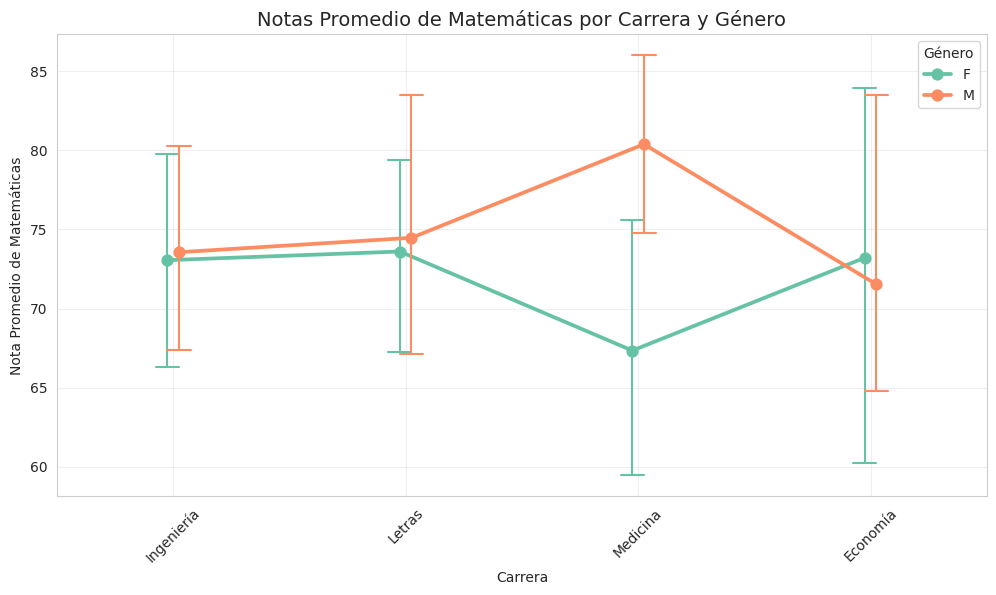

In [23]:
#3. Gráficos Categóricos Extendidos
#Ejemplo 5: Gráfico de barras apiladas

# Preparar datos
ventas_producto = ventas_data.groupby(['region', 'producto'])['ventas'].mean().unstack()

# Gráfico de barras apiladas
ventas_producto.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Ventas Promedio por Región y Producto (Apiladas)', fontsize=14)
plt.xlabel('Región')
plt.ylabel('Ventas Promedio ($)')
plt.legend(title='Producto', bbox_to_anchor=(1.05, 1))
plt.grid(True, alpha=0.3, axis='y')
plt.show()

plt.figure(figsize=(12, 6))
sns.pointplot(data=estudiantes_data,
             x='carrera',
             y='matematicas',
             hue='genero',
             palette='Set2',
             dodge=True,
             capsize=0.1,
             errwidth=1.5)
plt.title('Notas Promedio de Matemáticas por Carrera y Género', fontsize=14)
plt.xlabel('Carrera')
plt.ylabel('Nota Promedio de Matemáticas')
plt.xticks(rotation=45)
plt.legend(title='Género')
plt.grid(True, alpha=0.3)
plt.show()

#4. Visualizaciones Multivariadas

##Ejemplo 7: Gráfico de violín con swarmplot superpuesto

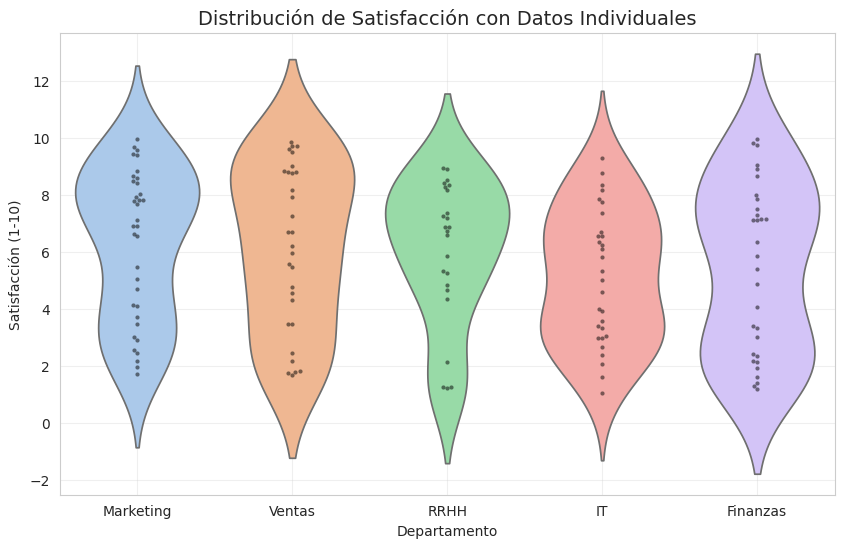

In [24]:
#4. Visualizaciones Multivariadas
#Ejemplo 7: Gráfico de violín con swarmplot superpuesto

plt.figure(figsize=(10, 6))
sns.violinplot(data=empleados_data, x='departamento', y='satisfaccion', palette='pastel', inner=None)
sns.swarmplot(data=empleados_data, x='departamento', y='satisfaccion', color='black', alpha=0.5, size=3)
plt.title('Distribución de Satisfacción con Datos Individuales', fontsize=14)
plt.xlabel('Departamento')
plt.ylabel('Satisfacción (1-10)')
plt.grid(True, alpha=0.3)
plt.show()

##Ejemplo 8: Mapa de calor con clustering

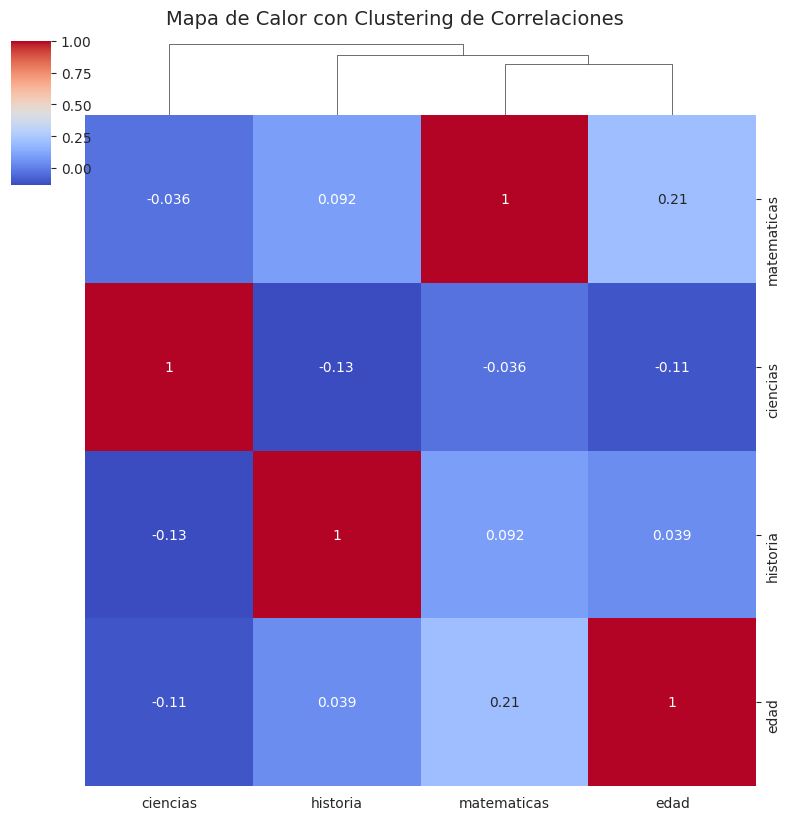

In [25]:
#Ejemplo 8: Mapa de calor con clustering

# Calcular correlaciones
corr = estudiantes_data[['matematicas', 'ciencias', 'historia', 'edad']].corr()

# Cluster map
sns.clustermap(corr,
              annot=True,
              cmap='coolwarm',
              figsize=(8, 8),
              row_cluster=False,
              dendrogram_ratio=0.1)
plt.suptitle('Mapa de Calor con Clustering de Correlaciones', y=1.02, fontsize=14)
plt.show()

#5. Visualizaciones de Relación


##Ejemplo 9: Gráfico de facetas (FacetGrid)

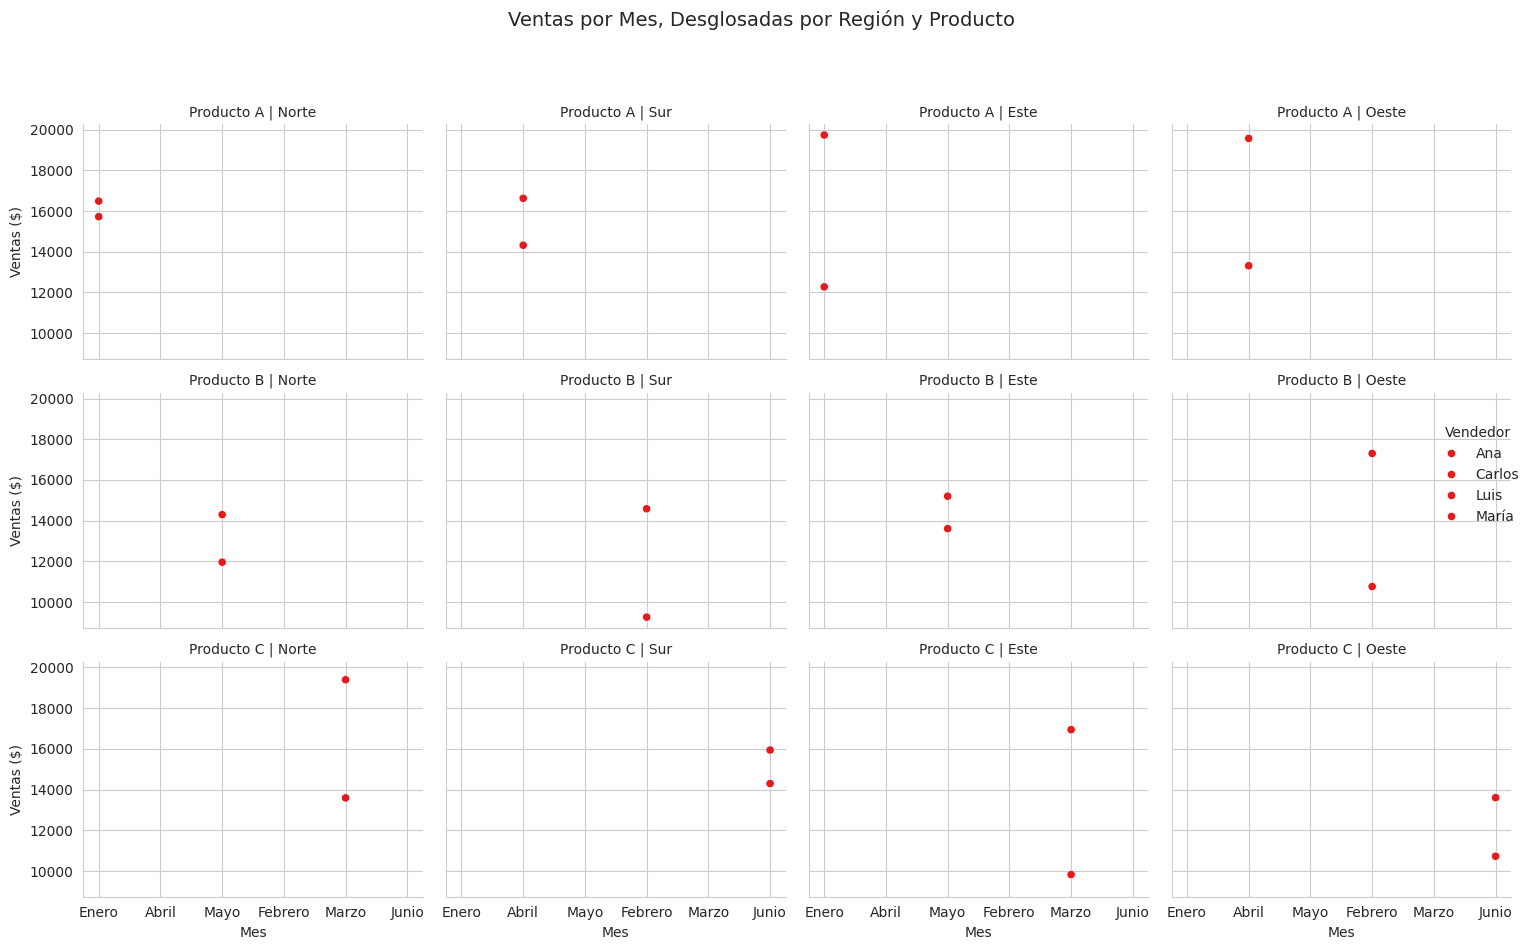

In [26]:
#5. Visualizaciones de Relación
#Ejemplo 9: Gráfico de facetas (FacetGrid)

g = sns.FacetGrid(ventas_data, col='region', row='producto', height=3, aspect=1.2)
g.map_dataframe(sns.scatterplot, x='mes', y='ventas', hue='vendedor', palette='Set1')
g.add_legend(title='Vendedor')
g.set_axis_labels('Mes', 'Ventas ($)')
g.set_titles(col_template='{col_name}', row_template='Producto {row_name}')
plt.suptitle('Ventas por Mes, Desglosadas por Región y Producto', y=1.05, fontsize=14)
plt.tight_layout()
plt.show()

##Ejemplo 10: Gráfico de línea con bandas de confianza

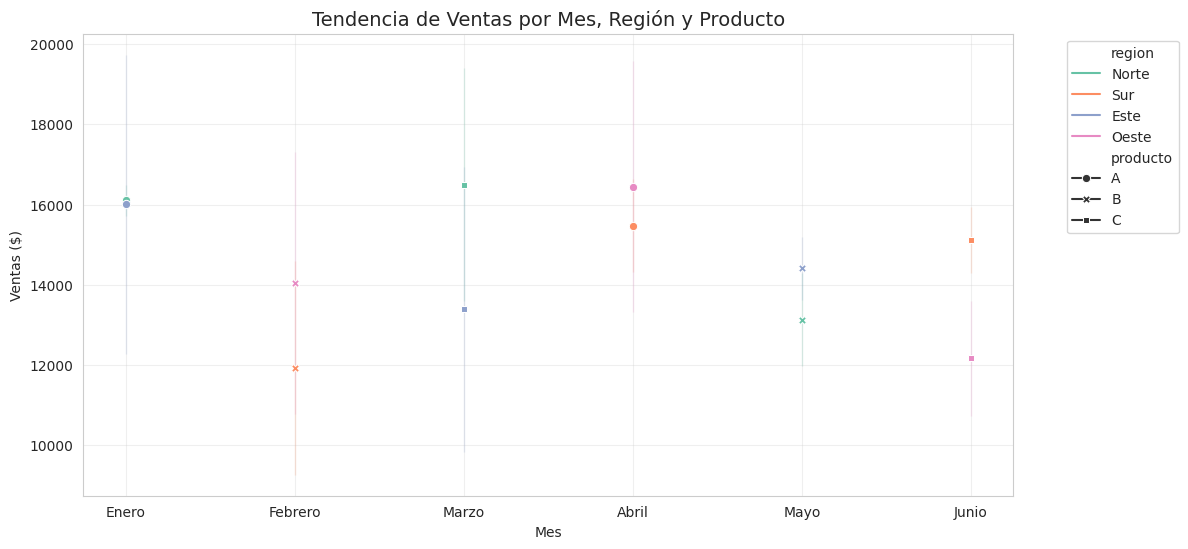

In [27]:
#Ejemplo 10: Gráfico de línea con bandas de confianza

plt.figure(figsize=(12, 6))
sns.lineplot(data=ventas_data,
            x='mes',
            y='ventas',
            hue='region',
            style='producto',
            markers=True,
            dashes=False,
            ci=95,  # Intervalo de confianza del 95%
            palette='Set2')
plt.title('Tendencia de Ventas por Mes, Región y Producto', fontsize=14)
plt.xlabel('Mes')
plt.ylabel('Ventas ($)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()

#6. Visualizaciones de Composición


##Ejemplo 11: Gráfico de área apilada

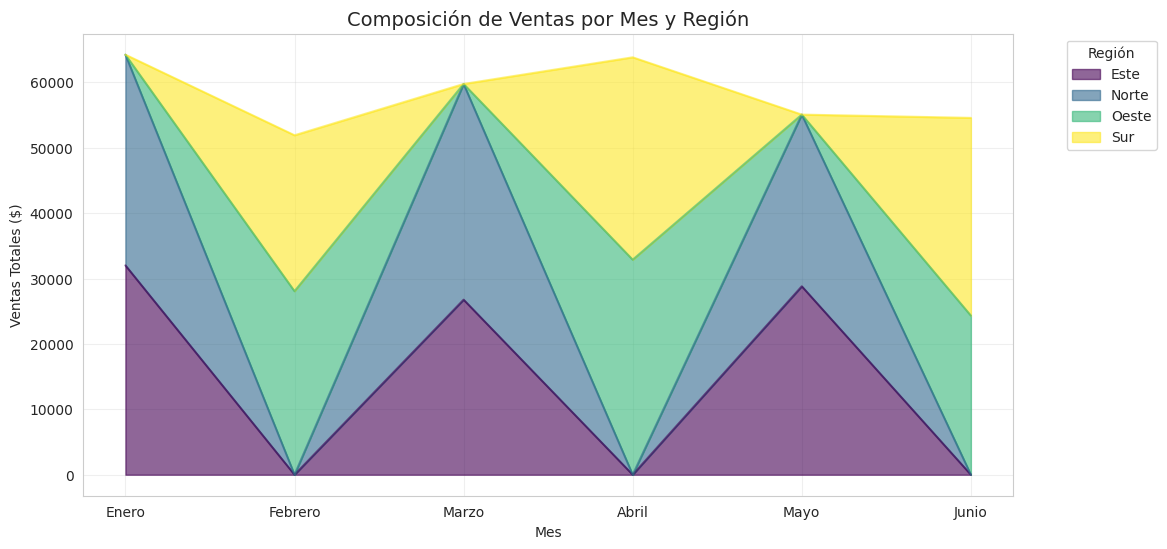

In [28]:
#6. Visualizaciones de Composición
#Ejemplo 11: Gráfico de área apilada

# Preparar datos
ventas_mes_region = ventas_data.groupby(['mes', 'region'])['ventas'].sum().unstack()

# Ordenar meses cronológicamente
meses_orden = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio']
ventas_mes_region = ventas_mes_region.loc[meses_orden]

# Gráfico de área
ventas_mes_region.plot(kind='area', figsize=(12, 6), alpha=0.6, colormap='viridis')
plt.title('Composición de Ventas por Mes y Región', fontsize=14)
plt.xlabel('Mes')
plt.ylabel('Ventas Totales ($)')
plt.legend(title='Región', bbox_to_anchor=(1.05, 1))
plt.grid(True, alpha=0.3)
plt.show()

##Ejemplo 12: Gráfico de waffle (alternativa)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 58.4 MB/s eta 0:00:00


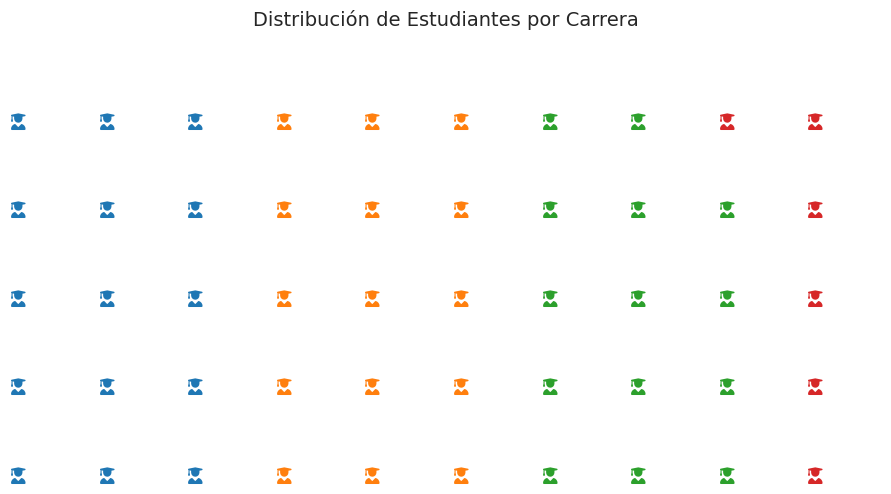

In [30]:
#Ejemplo 12: Gráfico de waffle (alternativa)

!pip install pywaffle

from pywaffle import Waffle

# Contar estudiantes por carrera
carrera_counts = estudiantes_data['carrera'].value_counts()

# Crear gráfico de waffle
plt.figure(FigureClass=Waffle,
          rows=5,
          columns=10,
          values=carrera_counts,
          colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'],
          legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
          icons='user-graduate',
          icon_size=12,
          figsize=(10, 5))
plt.title('Distribución de Estudiantes por Carrera', fontsize=14, pad=20)
plt.show()

#7. Visualizaciones Interactivas (opcional para notebooks)


##Ejemplo 13: Gráfico interactivo con Plotly Express

In [31]:
#7. Visualizaciones Interactivas (opcional para notebooks)
#Ejemplo 13: Gráfico interactivo con Plotly Express

import plotly.express as px

fig = px.scatter_3d(estudiantes_data,
                   x='matematicas',
                   y='ciencias',
                   z='historia',
                   color='carrera',
                   symbol='genero',
                   size='edad',
                   opacity=0.7,
                   title='Relación entre Notas de Matemáticas, Ciencias e Historia')
fig.show()

##Ejemplo 14: Sunburst chart

In [32]:
#Ejemplo 14: Sunburst chart

fig = px.sunburst(ventas_data,
                 path=['region', 'vendedor', 'producto'],
                 values='ventas',
                 color='ventas',
                 color_continuous_scale='viridis',
                 title='Composición de Ventas por Región, Vendedor y Producto')
fig.show()

#8. Análisis Complementario Avanzado


##Ejemplo 15: Gráfico de radar (spider chart)

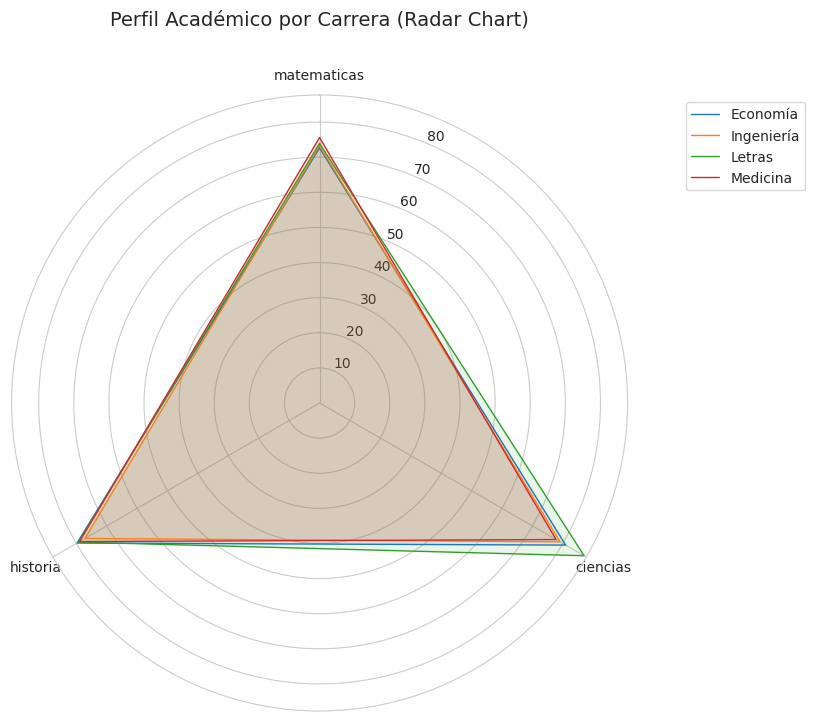

In [33]:
#8. Análisis Complementario Avanzado
#Ejemplo 15: Gráfico de radar (spider chart)

from math import pi

# Calcular promedios por carrera
carrera_stats = estudiantes_data.groupby('carrera')[['matematicas', 'ciencias', 'historia']].mean()

# Prepara datos para radar chart
categories = carrera_stats.columns.tolist()
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], categories)

for idx, carrera in enumerate(carrera_stats.index):
    values = carrera_stats.loc[carrera].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=carrera)
    ax.fill(angles, values, alpha=0.1)

plt.title('Perfil Académico por Carrera (Radar Chart)', y=1.1, fontsize=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

##Ejemplo 16: Gráfico de correlación con seaborn

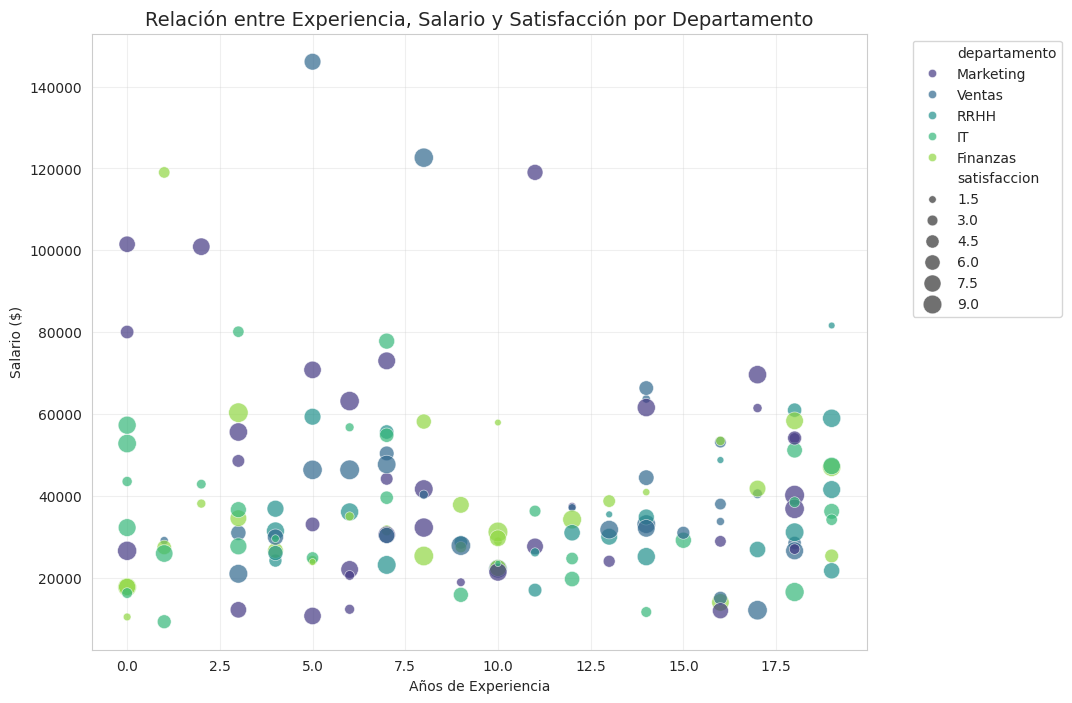

In [34]:
#Ejemplo 16: Gráfico de correlación con seaborn

plt.figure(figsize=(10, 8))
sns.scatterplot(data=empleados_data,
               x='experiencia',
               y='salario',
               hue='departamento',
               size='satisfaccion',
               sizes=(20, 200),
               alpha=0.7,
               palette='viridis')
plt.title('Relación entre Experiencia, Salario y Satisfacción por Departamento', fontsize=14)
plt.xlabel('Años de Experiencia')
plt.ylabel('Salario ($)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()